In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import data_process as dp
import validate as v

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

%matplotlib inline

In [23]:
df = pd.read_csv('FinalDataLabeled.csv',  index_col=0)
df

,Date,Price,RSI,MovingAverage10,EMA10,MovingAverage21,EMA21,MovingAverage50,EMA50,LowerBB,...,RoC12,Momentum14,RoC14,Momentum21,RoC21,AvgSentiment,TweetFreq,signals_7d,signals_14d,signals_30d
167,2011-01-01,0.300000,75.369476,0.275862,0.280994,0.258329,0.265562,0.253609,0.243577,0.213209,...,0.123596,1.244813,0.244813,1.315789,0.315789,1.0,0.000014,1.0,1.0,1.0
168,2011-01-02,0.299970,75.937629,0.280862,0.284444,0.262145,0.268690,0.254089,0.245788,0.216271,...,0.242441,1.249354,0.249354,1.364408,0.364408,0.5,0.000000,1.0,1.0,1.0
169,2011-01-03,0.295000,64.976230,0.285562,0.286363,0.265354,0.271082,0.254408,0.247718,0.217471,...,0.180000,1.104869,0.104869,1.296104,0.296104,0.5,0.000000,1.0,1.0,1.0
170,2011-01-04,0.298950,90.013927,0.290467,0.288652,0.267842,0.273616,0.255018,0.249727,0.219984,...,0.195943,1.238216,0.238216,1.211845,0.211845,0.5,0.000000,1.0,1.0,1.0
171,2011-01-05,0.298916,88.615791,0.293862,0.290518,0.270648,0.275916,0.256496,0.251656,0.221606,...,0.205308,1.195665,0.195665,1.245485,0.245485,0.5,0.000000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,2021-12-27,50796.377674,69.602868,49219.216563,49804.785557,48857.489121,50127.943013,54580.594563,52486.513401,45566.701358,...,0.040257,1.085733,0.085733,1.005164,0.005164,0.5,0.000000,NaN,NaN,NaN
4181,2021-12-28,47673.044045,47.384776,49296.033600,49417.196192,48719.325846,49904.770380,54183.220334,52297.749897,45497.817908,...,0.000201,0.987169,-0.012831,0.942631,-0.057369,0.5,0.000000,NaN,NaN,NaN
4182,2021-12-29,46470.321575,40.567501,49255.423065,48881.400807,48527.405237,49592.547761,53770.715052,52069.223296,45290.272181,...,0.002932,0.951664,-0.048336,0.920192,-0.079808,1.0,0.052500,NaN,NaN,NaN
4183,2021-12-30,47102.463004,47.657892,49270.193018,48557.957570,48487.626197,49366.176420,53417.642753,51874.448382,45246.062154,...,0.004213,0.988230,-0.011770,0.982574,-0.017426,1.0,0.349371,NaN,NaN,NaN


In [24]:
x_train, x_test, y_train, y_test = dp.scale_split(df, 7, 1)

In [25]:
neurons = [5,10,20,50,100,150,200]

In [26]:
accuracies1 = v.single_layer(neurons, x_train, y_train)

# Filtered data

In [27]:
# df['Time'] = pd.to_datetime(df['Time'],format='%Y-%m-%d')
df_fil = df
df_fil['Date'] = pd.to_datetime(df_fil['Date'],format='%Y-%m-%d')
df_fil = df_fil[df_fil['Date'] >= pd.Timestamp(2015, 1, 1)]
df_fil = df_fil[df_fil['Date'] <= pd.Timestamp(2021, 12, 31)]
df_fil

,Date,Price,RSI,MovingAverage10,EMA10,MovingAverage21,EMA21,MovingAverage50,EMA50,LowerBB,...,RoC12,Momentum14,RoC14,Momentum21,RoC21,AvgSentiment,TweetFreq,signals_7d,signals_14d,signals_30d
1628,2015-01-01,314.776472,50.602414,319.924813,319.468805,327.067766,328.172198,353.887226,345.515290,300.070243,...,-0.046322,1.004034,0.004034,0.902991,-0.097009,1.0,0.008380,0.0,0.0,0.0
1629,2015-01-02,315.942732,48.865961,317.910673,318.827701,325.294057,327.060428,351.767791,344.355582,300.589318,...,-0.015732,0.992772,-0.007228,0.894539,-0.105461,1.0,0.007996,0.0,0.0,0.0
1630,2015-01-03,285.647310,31.474856,314.172175,312.794903,322.265693,323.295599,349.512959,342.053296,296.156665,...,-0.139208,0.865425,-0.134575,0.817904,-0.182096,1.0,0.007337,0.0,0.0,0.0
1631,2015-01-04,263.334575,28.344632,308.606018,303.802116,317.849258,317.844597,347.219774,338.966288,283.766133,...,-0.216462,0.820376,-0.179624,0.739538,-0.260462,1.0,0.009463,1.0,0.0,0.0
1632,2015-01-05,275.003852,28.782956,303.185369,298.566068,314.416337,313.949984,344.915735,336.457957,276.788537,...,-0.148680,0.828718,-0.171282,0.792301,-0.207699,1.0,0.007543,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,2021-12-27,50796.377674,69.602868,49219.216563,49804.785557,48857.489121,50127.943013,54580.594563,52486.513401,45566.701358,...,0.040257,1.085733,0.085733,1.005164,0.005164,0.5,0.000000,NaN,NaN,NaN
4181,2021-12-28,47673.044045,47.384776,49296.033600,49417.196192,48719.325846,49904.770380,54183.220334,52297.749897,45497.817908,...,0.000201,0.987169,-0.012831,0.942631,-0.057369,0.5,0.000000,NaN,NaN,NaN
4182,2021-12-29,46470.321575,40.567501,49255.423065,48881.400807,48527.405237,49592.547761,53770.715052,52069.223296,45290.272181,...,0.002932,0.951664,-0.048336,0.920192,-0.079808,1.0,0.052500,NaN,NaN,NaN
4183,2021-12-30,47102.463004,47.657892,49270.193018,48557.957570,48487.626197,49366.176420,53417.642753,51874.448382,45246.062154,...,0.004213,0.988230,-0.011770,0.982574,-0.017426,1.0,0.349371,NaN,NaN,NaN


In [28]:
x_train_fil, x_test_fil, y_train_fil, y_test_fil = dp.scale_split(df_fil, 7, 1)

In [29]:
accuracies2 = v.single_layer(neurons, x_train_fil, y_train_fil)

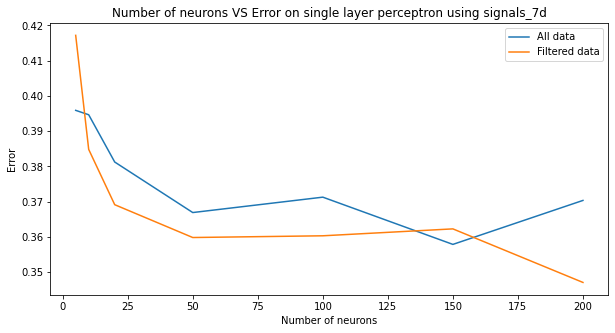

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(neurons,accuracies1, label='All data')
plt.plot(neurons,accuracies2, label='Filtered data')
plt.title('Number of neurons VS Error on single layer perceptron using signals_7d')
plt.xlabel('Number of neurons')
plt.ylabel('Error')
plt.legend()
plt.show()


In [38]:
min(accuracies1)
min(accuracies2)


0.34705882352941175

# Try signals_14d

In [31]:
x_train, x_test, y_train, y_test = dp.scale_split(df, 14, 1)
accuracies3 = v.single_layer(neurons, x_train, y_train)

In [32]:
x_train_fil, x_test_fil, y_train_fil, y_test_fil = dp.scale_split(df_fil, 14, 1)
accuracies4 = v.single_layer(neurons, x_train_fil, y_train_fil)

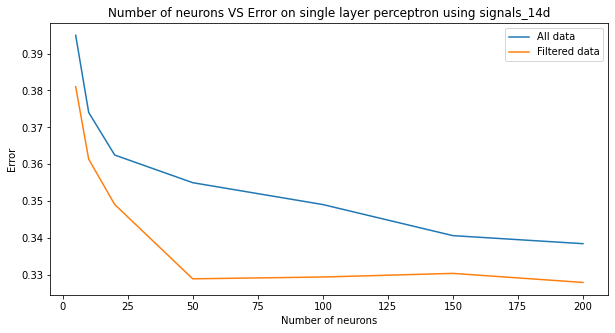

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(neurons,accuracies3, label='All data')
plt.plot(neurons,accuracies4, label='Filtered data')
plt.title('Number of neurons VS Error on single layer perceptron using signals_14d')
plt.xlabel('Number of neurons')
plt.ylabel('Error')
plt.legend()
plt.show()

In [40]:
min(accuracies3)
min(accuracies4)

0.32791663136490723

# Try signals_30d

In [34]:
x_train, x_test, y_train, y_test = dp.scale_split(df, 30, 1)
accuracies5 = v.single_layer(neurons, x_train, y_train)

In [35]:
x_train_fil, x_test_fil, y_train_fil, y_test_fil = dp.scale_split(df_fil, 30, 1)
accuracies6 = v.single_layer(neurons, x_train_fil, y_train_fil)

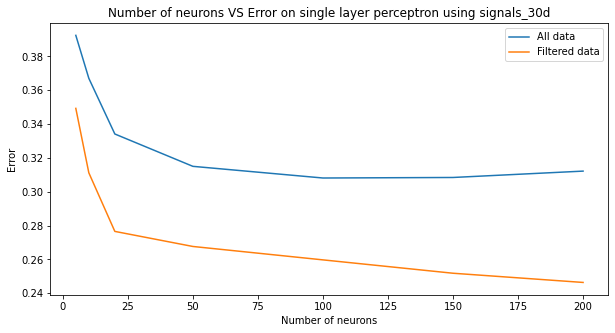

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(neurons,accuracies5, label='All data')
plt.plot(neurons,accuracies6, label='Filtered data')
plt.title('Number of neurons VS Error on single layer perceptron using signals_30d')
plt.xlabel('Number of neurons')
plt.ylabel('Error')
plt.legend()
plt.show()

In [42]:
# min(accuracies5)
min(accuracies6)

0.24641364136413646

# Compare all result

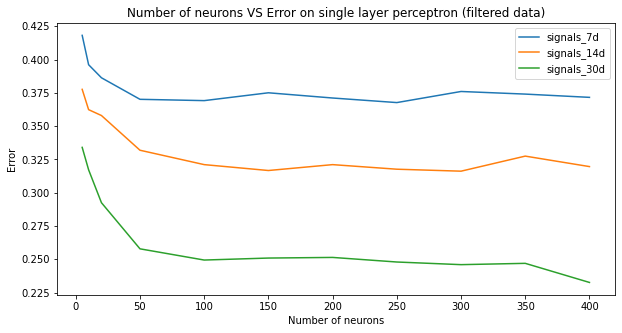

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(neurons,accuracies2, label='signals_7d')
plt.plot(neurons,accuracies4, label='signals_14d')
plt.plot(neurons,accuracies6, label='signals_30d')
plt.title('Number of neurons VS Error on single layer perceptron (filtered data)')
plt.xlabel('Number of neurons')
plt.ylabel('Error')
plt.legend()
plt.show()

# Without Sentiment

In [5]:
df2 = df
df2 = df2.drop(['AvgSentiment','TweetFreq'], axis=1)
# df2
df_fil2 = df_fil
df_fil2 = df_fil2.drop(['AvgSentiment','TweetFreq'], axis=1)
# df_fil2


In [7]:
x_train_ws, x_test_ws, y_train_ws, y_test_ws = dp.scale_split(df2, 7, 1)
accuracies7 = v.single_layer(neurons, x_train_ws, y_train_ws)

x_train_fil, x_test_fil, y_train_fil, y_test_fil = dp.scale_split(df_fil2, 7, 1)
accuracies8 = v.single_layer(neurons, x_train_fil, y_train_fil)

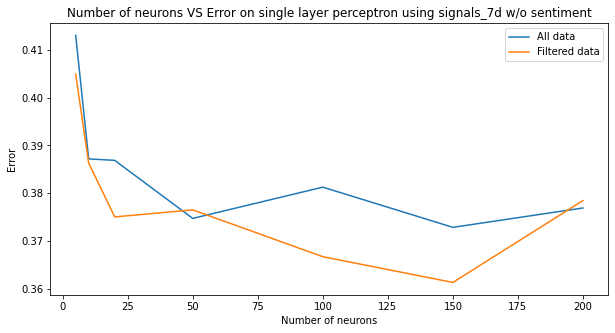

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(neurons,accuracies7, label='All data')
plt.plot(neurons,accuracies8, label='Filtered data')
plt.title('Number of neurons VS Error on single layer perceptron using signals_7d w/o sentiment')
plt.xlabel('Number of neurons')
plt.ylabel('Error')
plt.legend()
plt.show()

In [18]:
# min(accuracies7)
min(accuracies8)

0.3612745098039216

In [10]:
x_train_ws, x_test_ws, y_train_ws, y_test_ws = dp.scale_split(df2, 14, 1)
accuracies9 = v.single_layer(neurons, x_train_ws, y_train_ws)

x_train_fil, x_test_fil, y_train_fil, y_test_fil = dp.scale_split(df_fil2, 14, 1)
accuracies10 = v.single_layer(neurons, x_train_fil, y_train_fil)

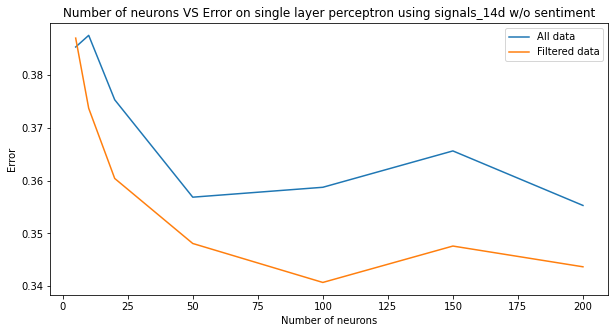

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(neurons,accuracies9, label='All data')
plt.plot(neurons,accuracies10, label='Filtered data')
plt.title('Number of neurons VS Error on single layer perceptron using signals_14d w/o sentiment')
plt.xlabel('Number of neurons')
plt.ylabel('Error')
plt.legend()
plt.show()

In [20]:
min(accuracies9)
min(accuracies10)

0.34072814417642006

In [12]:
x_train_ws, x_test_ws, y_train_ws, y_test_ws = dp.scale_split(df2, 30, 1)
accuracies11 = v.single_layer(neurons, x_train_ws, y_train_ws)

x_train_fil, x_test_fil, y_train_fil, y_test_fil = dp.scale_split(df_fil2, 30, 1)
accuracies12 = v.single_layer(neurons, x_train_fil, y_train_fil)

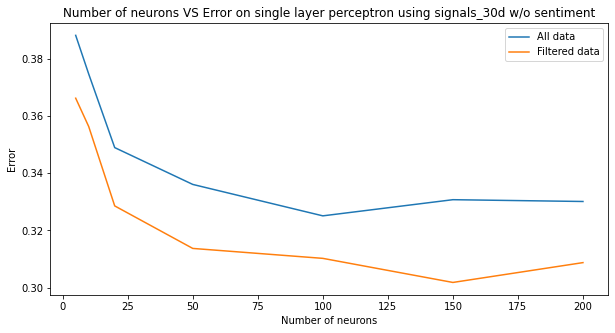

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(neurons,accuracies11, label='All data')
plt.plot(neurons,accuracies12, label='Filtered data')
plt.title('Number of neurons VS Error on single layer perceptron using signals_30d w/o sentiment')
plt.xlabel('Number of neurons')
plt.ylabel('Error')
plt.legend()
plt.show()

In [22]:
min(accuracies11)
min(accuracies12)

0.30183229434054515

# Compare result

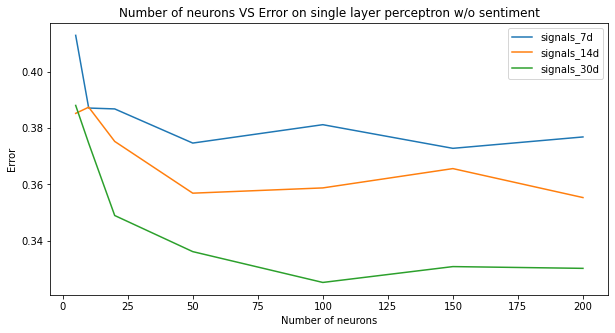

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(neurons,accuracies7, label='signals_7d')
plt.plot(neurons,accuracies9, label='signals_14d')
plt.plot(neurons,accuracies11, label='signals_30d')
plt.title('Number of neurons VS Error on single layer perceptron w/o sentiment')
plt.xlabel('Number of neurons')
plt.ylabel('Error')
plt.legend()
plt.show()